<a href="https://colab.research.google.com/github/salifoucamara/Sendy-Logistics-Challenge/blob/master/Analyse_des_donn%C3%A9es_du_Naufrage_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Triste célèbre histoire du naufrage de Titanic**

***Le 15 avril 1912, lors de son voyage inaugural, le RMS Titanic, largement considéré comme « insubmersible », coula après une collision avec un iceberg. Malheureusement, les canots de sauvetage n'étaient pas assez nombreux pour tous les passagers à bord, entraînant la mort de 1 502 des 2 224 passagers et membres d'équipage***.

***Même si la survie a été en partie due à la chance, il semble que certains groupes de personnes aient eu plus de chances de survivre que d’autres.***

*Quels types de personnes étaient plus susceptibles de survivre ?*
**But :**
**Prédire si un passager a survécu au naufrage du Titanic.**
***Pour chaque variable de l'ensemble de tests, vous devez prédire une valeur de 0 ou 1.***
***Le score correspond au pourcentage de passagers qui sont prédisent correctement. C'est ce qu'on appelle la précision .***

####***c'est parti !!!***


#**ETL - EXTRACTION TRANSFORMATION LECTURE**
####**IMPORTATION DES DONNÉES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
from google.colab import userdata

# Set Kaggle credentials as environment variables
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

# You can now try running the download cell again

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 8.29MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

####**LECTURE DES DONNÉES**

In [ ]:
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

####**INSPECTION DES DONNÉES**
######**Taille**

In [ ]:
train = trainset.copy()
train.shape

(891, 12)

In [ ]:
testset.shape

(418, 11)

In [ ]:
pd.set_option('display.max_rows', 891)
pd.set_option('display.max_columns', 12)

######**Vue du jeu de données**

In [ ]:
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Trainset_columns :--", list(train.columns))
print("Testset_columns :---", list(testset.columns))

Trainset_columns :-- ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Testset_columns :--- ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


######**Informations générales sur les types et formats de données**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


######**Nombre de colonnes selon le type de données**

In [ ]:
train.dtypes.value_counts()

,count
int64,5
object,5
float64,2


######**Statistiques sommaires sur les variables numériques**

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


######**Statistiques sommaires sur les variables catégorielles**

In [ ]:
train.describe(include = "O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


######**Vérification des doublons**

In [ ]:
train.duplicated().sum()

np.int64(0)

##**Inspection des valeurs manquantes**
######**pourcentage par colonne des valeurs manquantes**

In [ ]:
(train.isna().sum() / train.shape[0]).sort_values(ascending=False)

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


######**Visualisation par colonne des valeurs manquantes**

<Axes: >

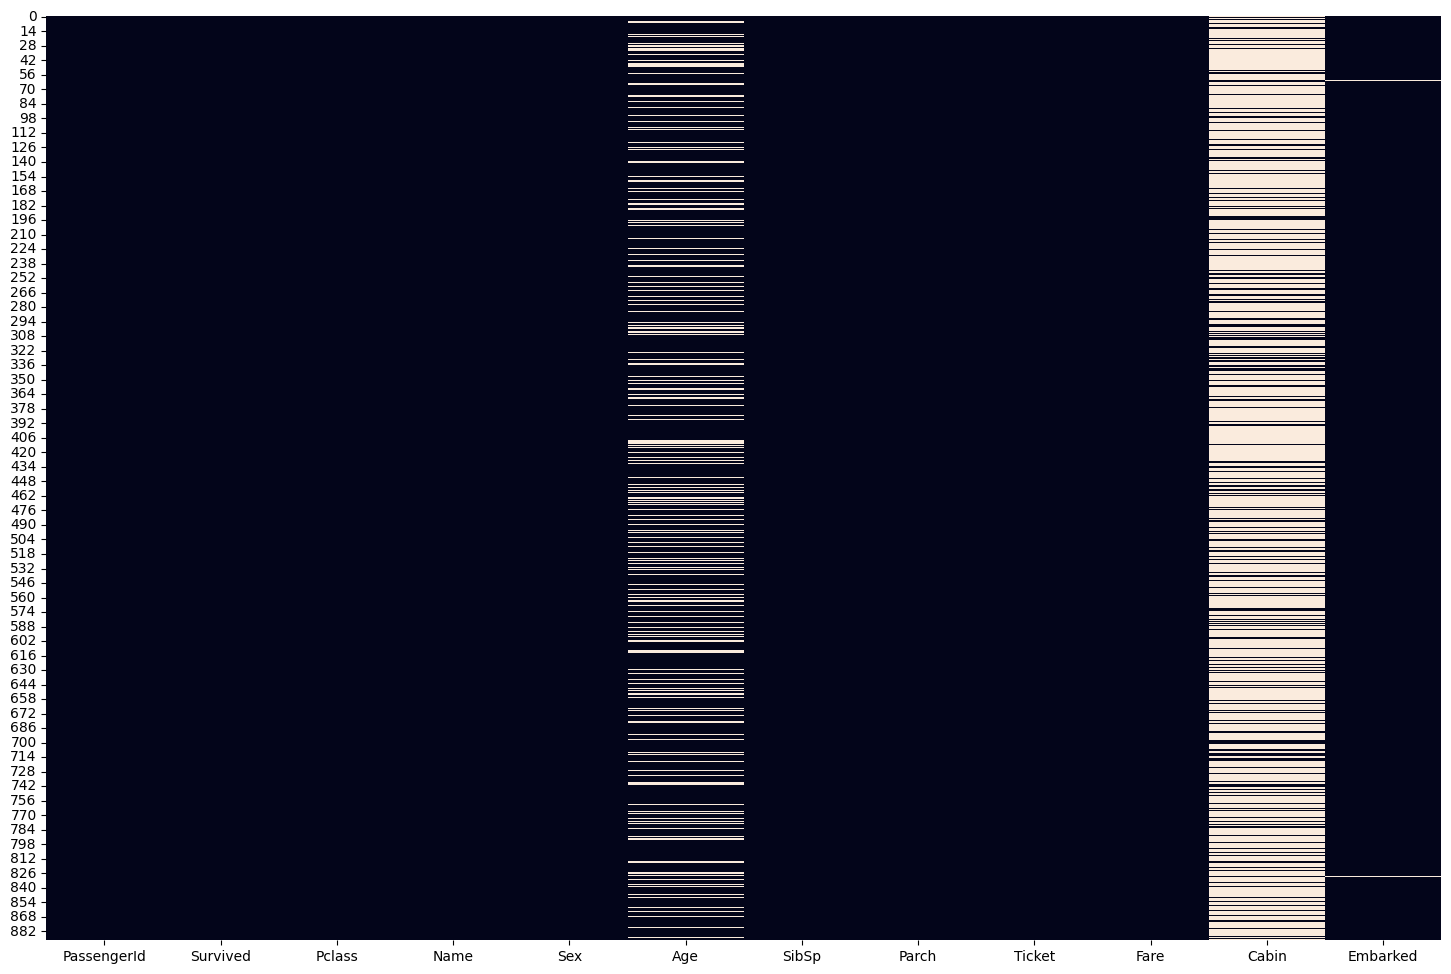

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(train.isna(), cbar=False)

#**Anonymisation et filtrage des caractéristiques**

Les colonnes **Passagerid** et **Nom** feront l'objet d'anonymat
Colonne **Ticket** est moins important connaissant le tarif payé par le passager
Colonnes **Cabin** représente 77% d'enregistrement manquant
**Notre analyse se portera sur les huit autres colonnes dans un premier temps, ensuite, sera approfondie sur les colonnes Pclass** , **Sex** , **Age** et **Survived** .

In [ ]:
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train.shape

(891, 8)

In [ ]:
train.dtypes.value_counts()

,count
int64,4
object,3
float64,2


#**EDA - ANALYSE EXPLORATOIRE DES DONNÉES**

####**ANALYSE UNIVARIÉE ET BIVARIÉE AVEC CARACTÉRISTIQUE/VARIABLE CIBLE**

######**Analyse de la variable cible / target**

Survived
0    549
1    342
Name: count, dtype: int64


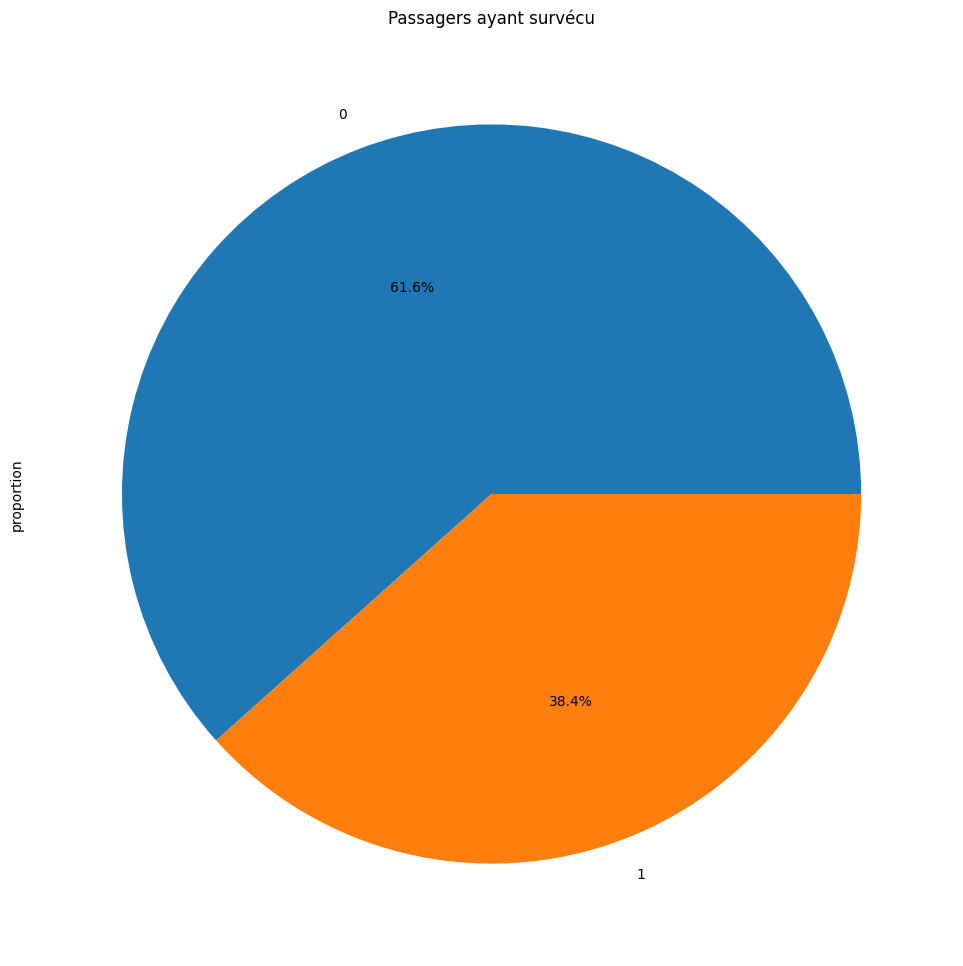

In [ ]:
print(train['Survived'].value_counts())

train['Survived'].value_counts(normalize=True).plot.pie(figsize=(12, 12), autopct='%1.1f%%')
plt.title(f'Passagers ayant survécu')
plt.show()

######**Analyse du nombre de frères et sœurs Conjoints à bord du Titanic**

Les passagers ayant voyagé avec leurs frères et sœurs Conjoints ont-ils été épargnés ?

SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64


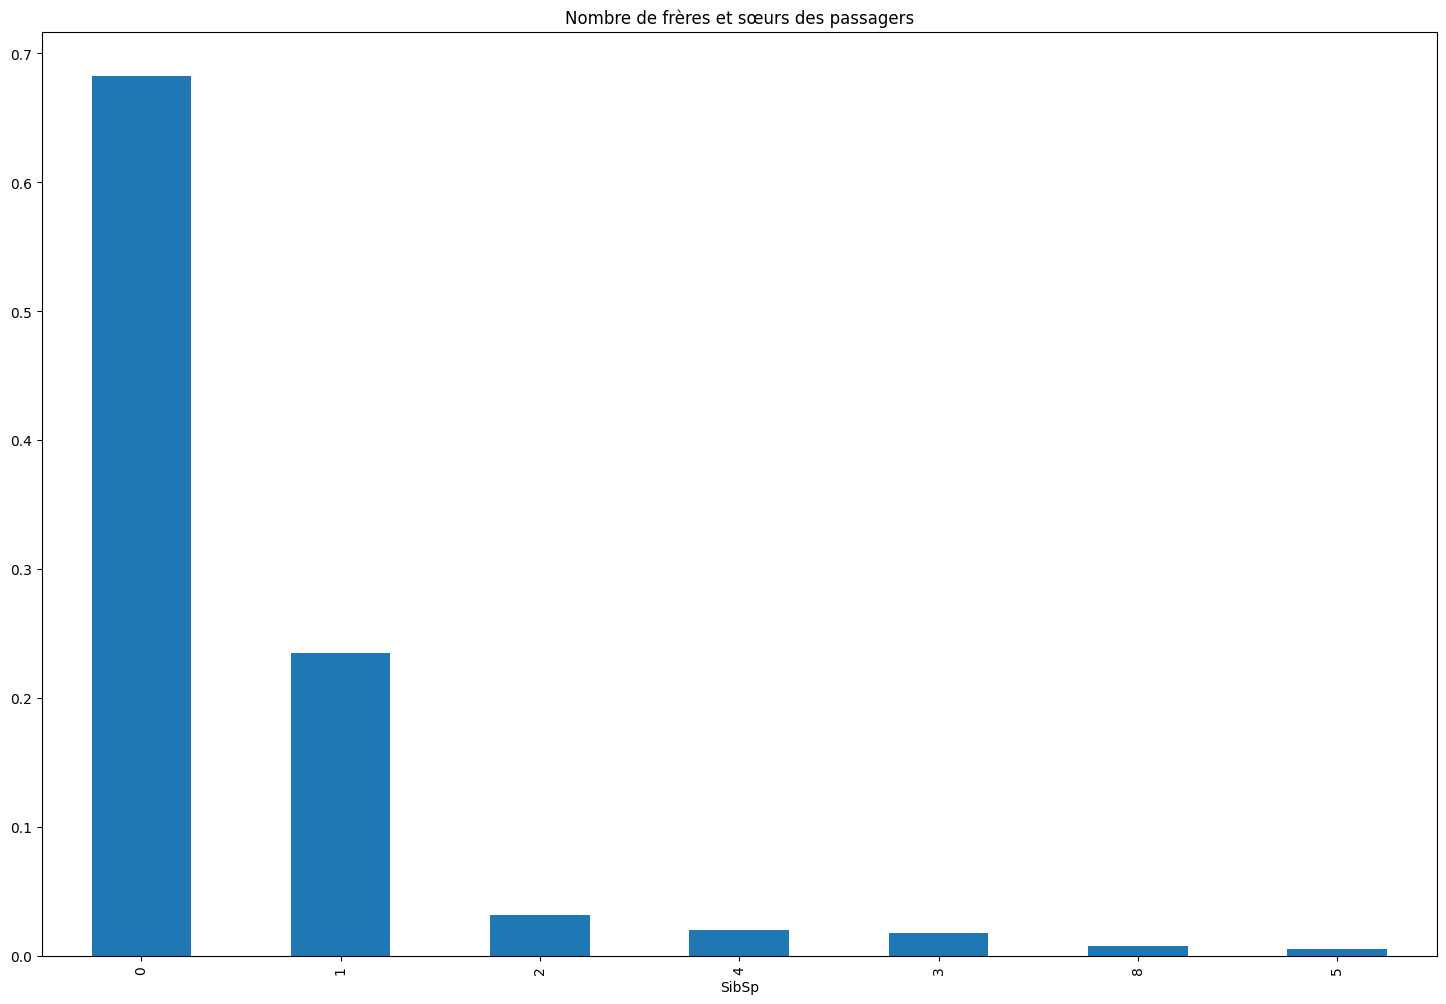

In [ ]:
print(train['SibSp'].value_counts(normalize=True))


plt.figure(figsize=(12, 12))
train['SibSp'].value_counts(normalize=True).plot.bar(figsize=(18, 12))
plt.title(f'Nombre de frères et sœurs des passagers')
plt.show()

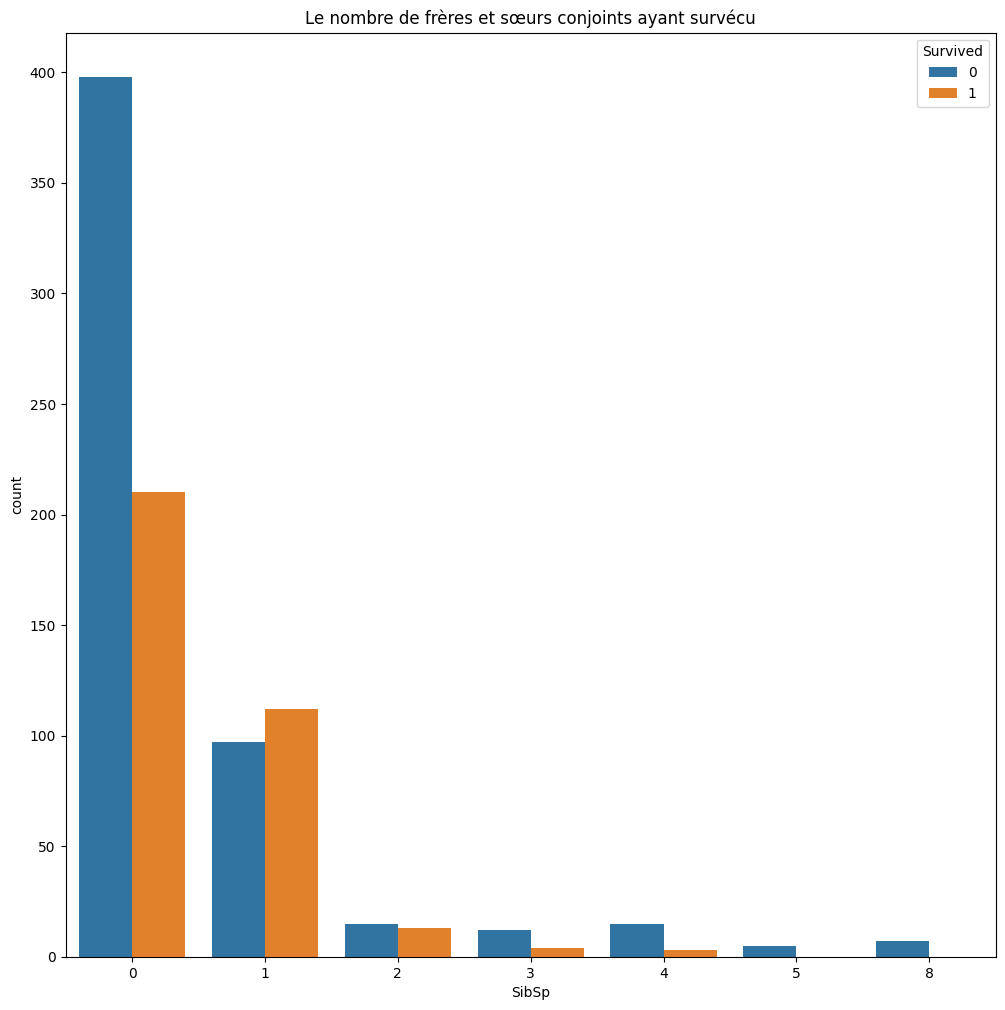

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.countplot(x='SibSp', hue='Survived', data=train)
plt.title(f'Le nombre de frères et sœurs conjoints ayant survécu')
plt.show()

######**Analyse du nombre de parents / enfants à bord du Titanic**
Les passagers ayant voyagé avec leurs parents/enfants ont-ils été les plus touchés par le naufrage ?

Parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: float64


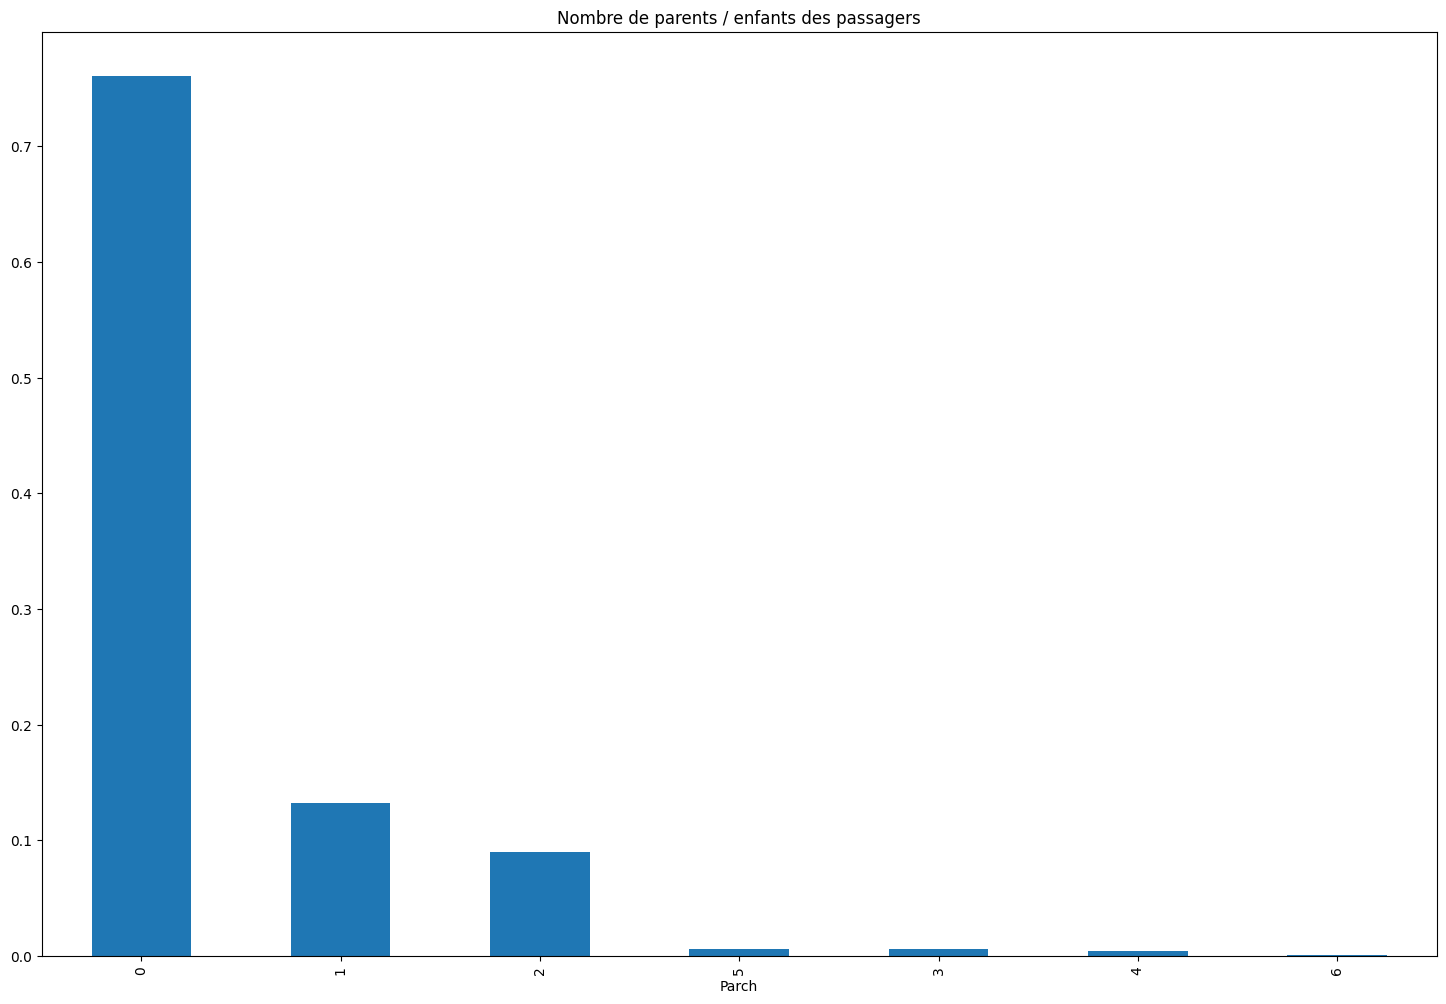

In [ ]:

print(train['Parch'].value_counts(normalize=True))

plt.figure(figsize=(12, 12))
train['Parch'].value_counts(normalize=True).plot.bar(figsize=(18, 12))
plt.title(f'Nombre de parents / enfants des passagers')
plt.show()

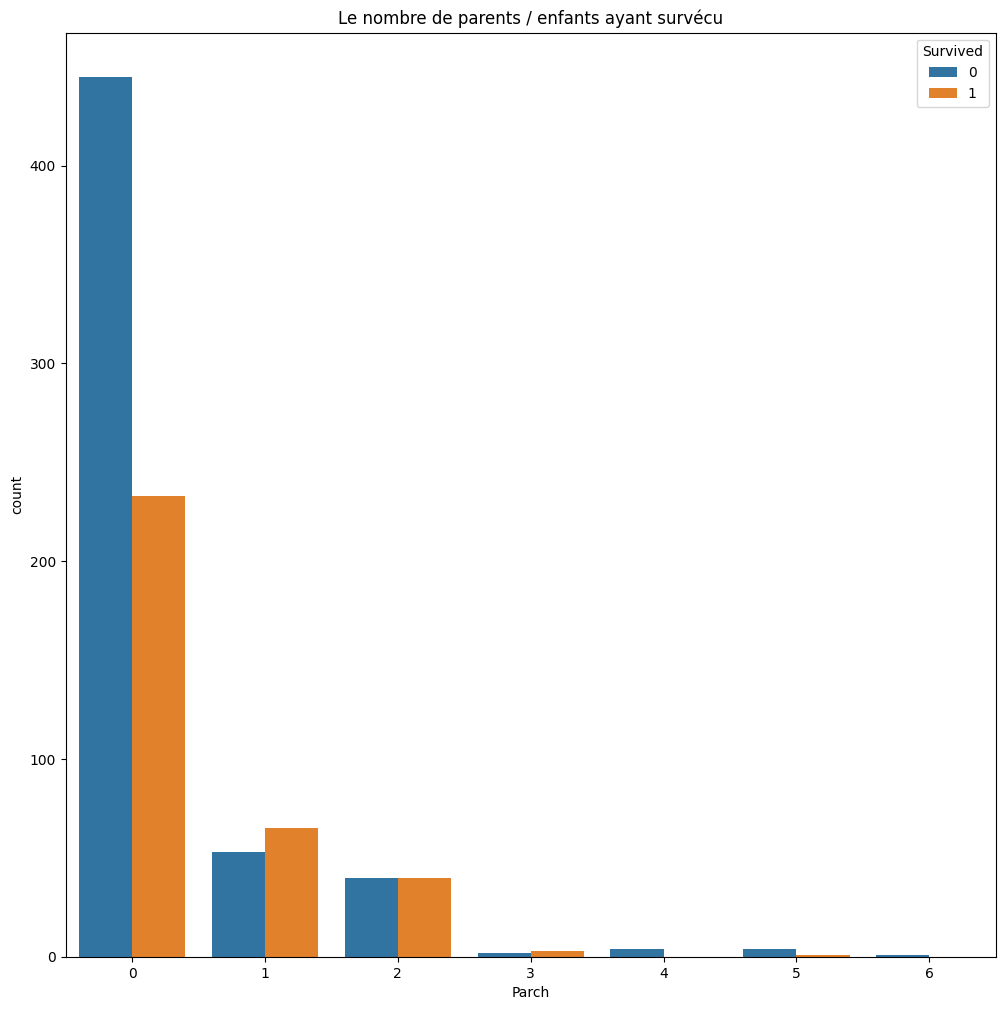

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.countplot(x='Parch', hue='Survived', data=train)
plt.title(f'Le nombre de parents / enfants ayant survécu')
plt.show()

######**Tarification des passagers à bord du Titanic**
Le fait que certains passagers aient payé le prix cher à bord du Titanic a-t-il joué en leur faveur ?

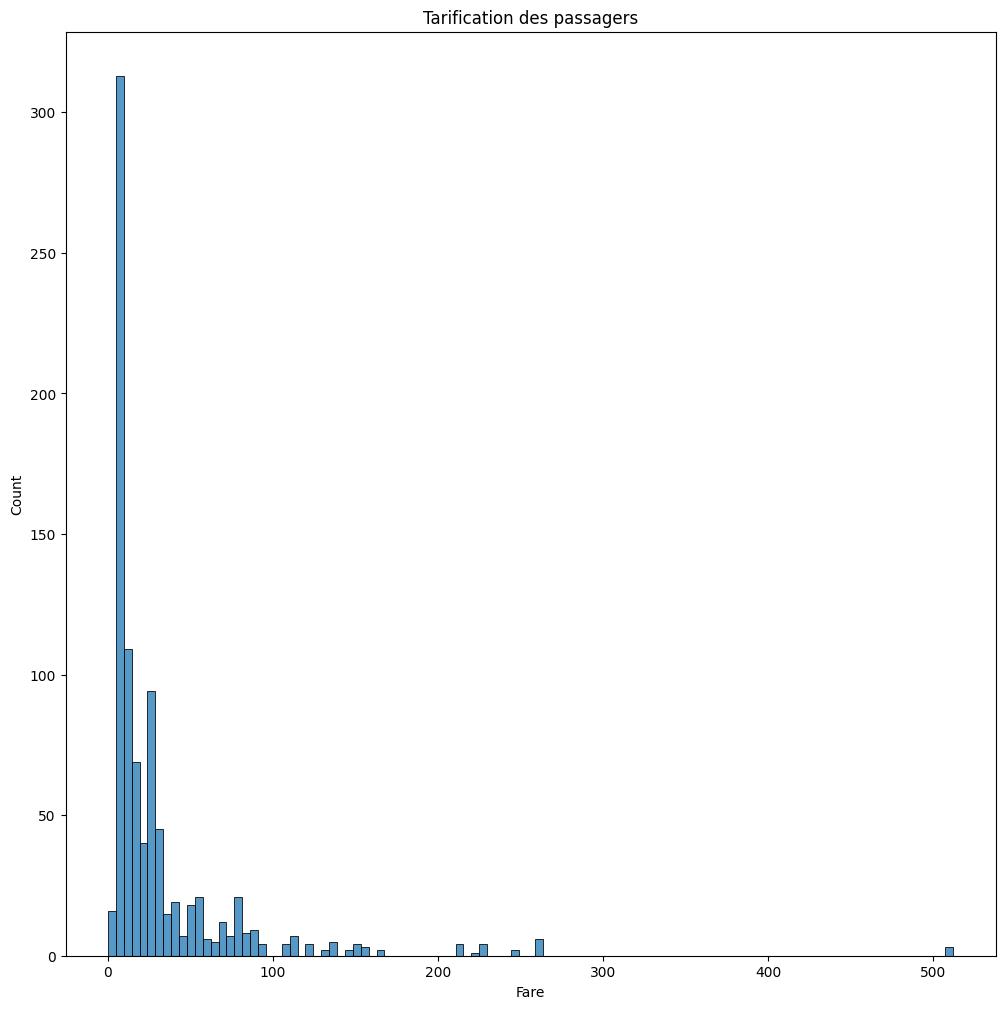

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.histplot(x='Fare', data=train)
plt.title(f'Tarification des passagers')
plt.show()

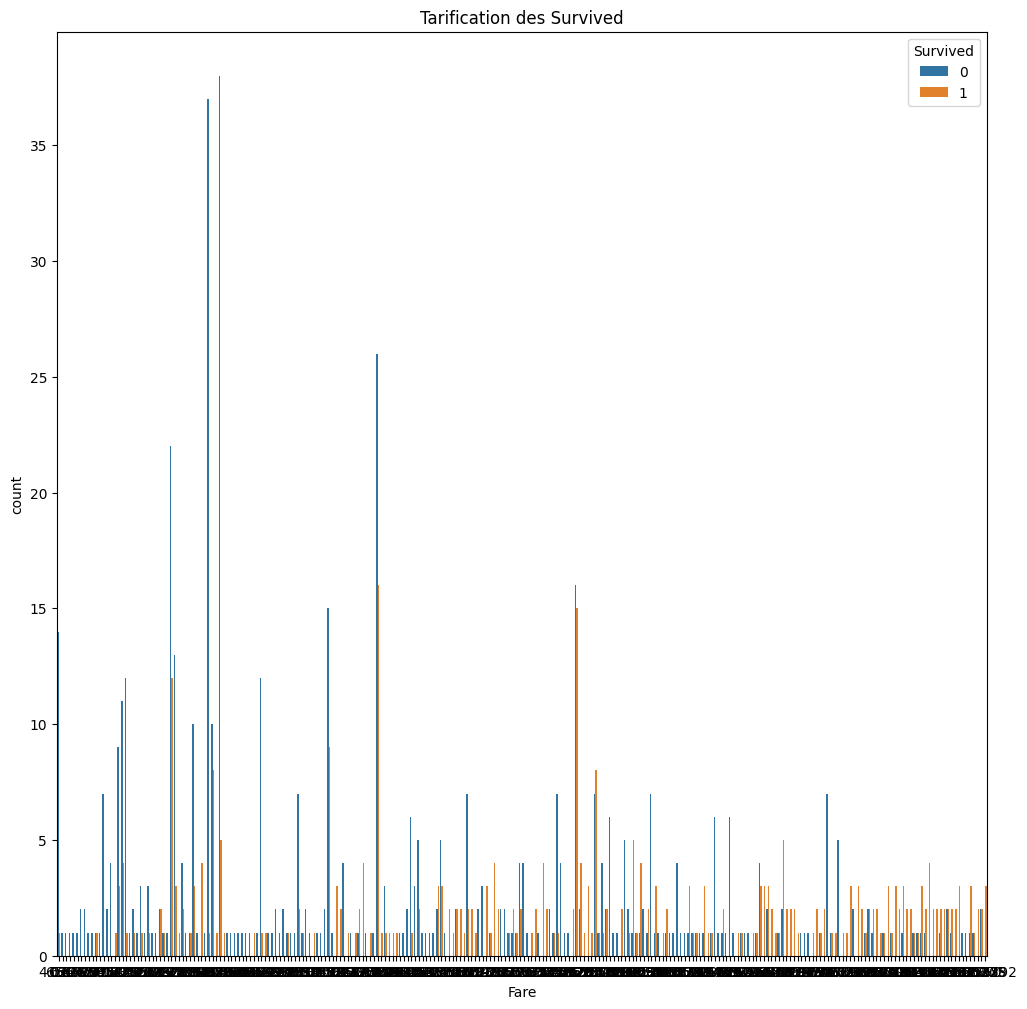

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.countplot(x='Fare', hue='Survived', data=train)
plt.title(f'Tarification des Survived')
plt.show()


######**Analyse selon le site d'embarquement des passagers à bord du Titanic**
Le site d'embarquement des passagers à bord du Titanic fut-il une aubaine pour certains ?

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


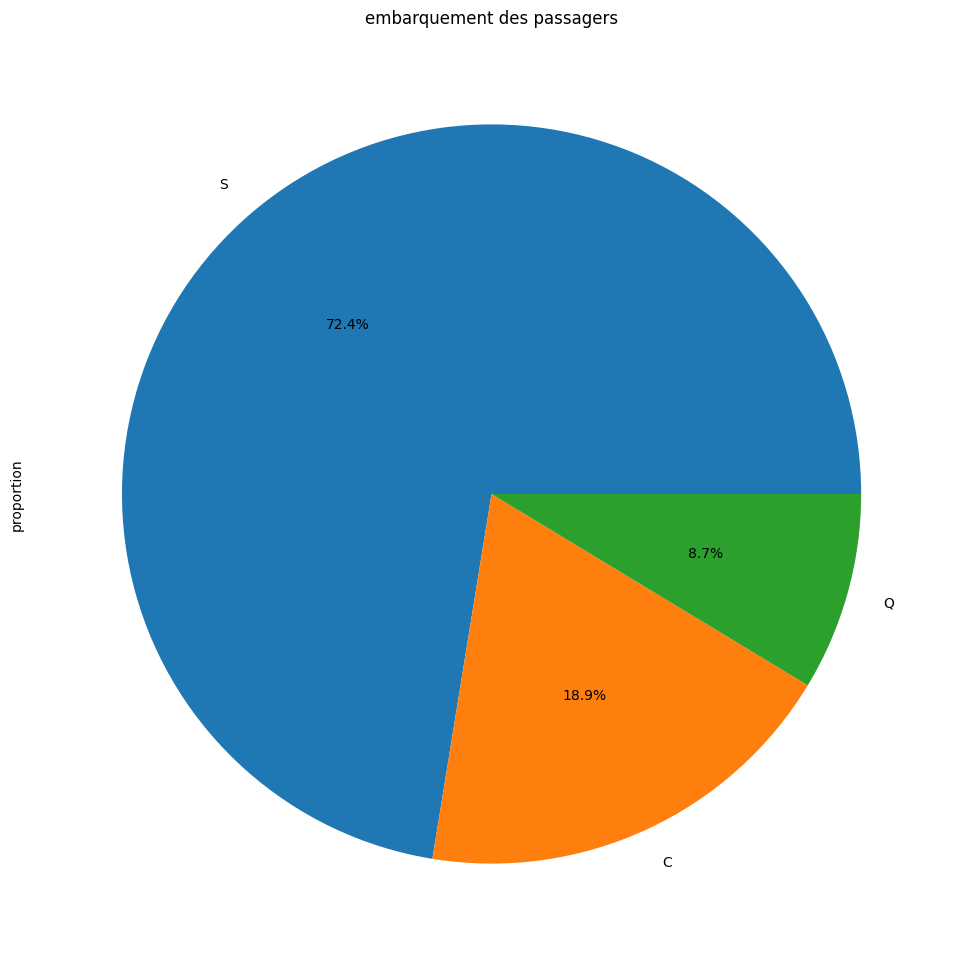

In [ ]:
print(train['Embarked'].value_counts())

plt.figure(figsize=(12, 12))
plt.subplot()
train['Embarked'].value_counts(normalize=True).plot.pie(figsize=(18, 12), autopct='%1.1f%%')
plt.title(f'embarquement des passagers')
plt.show()

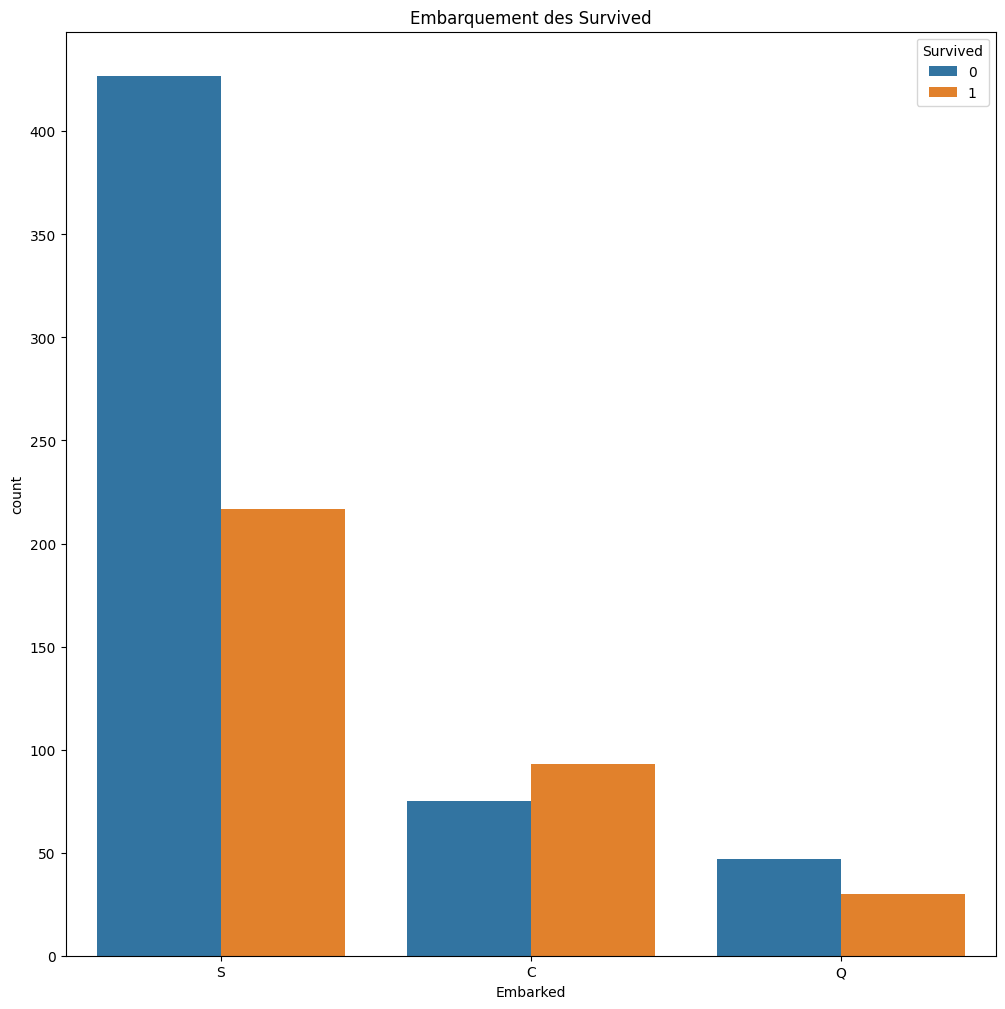

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Embarquement des Survived')
plt.show()

######**Analyse selon la classe dans laquelle le passager à voyager à bord du Titanic**
Dans quelle classe à bord les passagers ont plus survécu ?

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


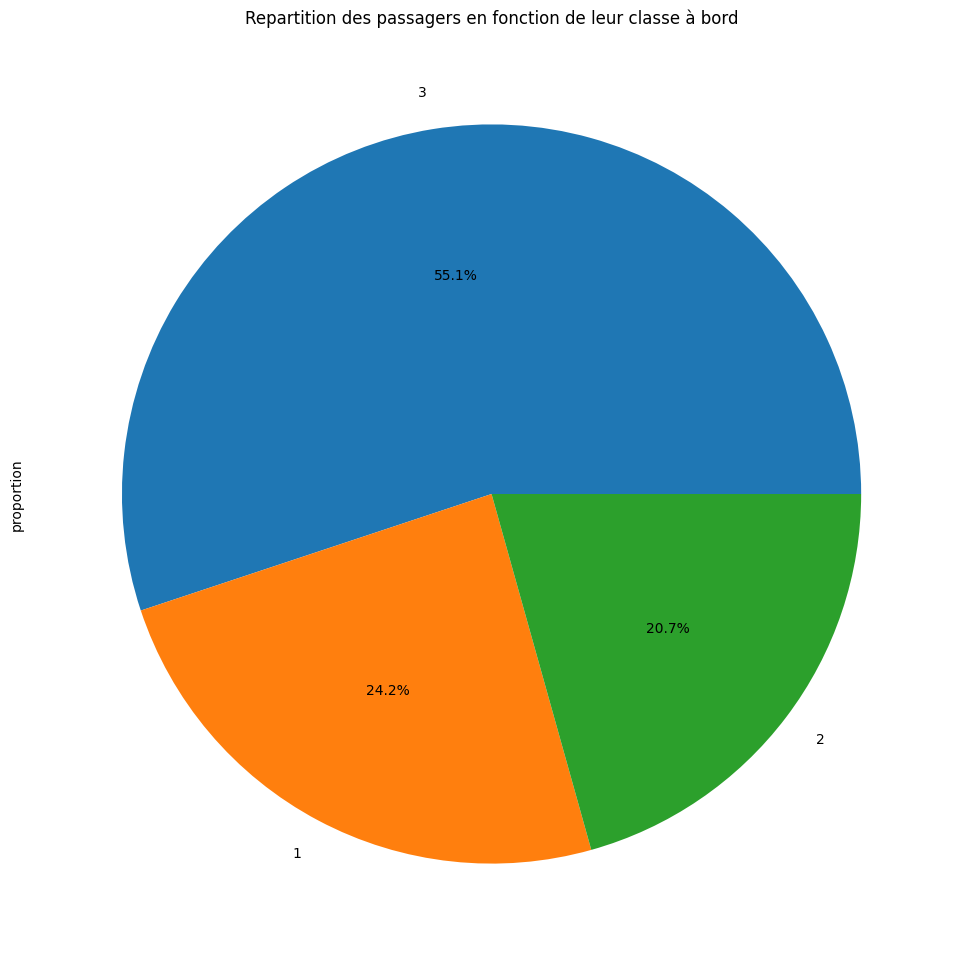

In [ ]:
print(train['Pclass'].value_counts())

plt.figure(figsize=(12, 12))
plt.subplot()
train['Pclass'].value_counts(normalize=True).plot.pie(figsize=(18, 12), autopct='%1.1f%%')
plt.title(f'Repartition des passagers en fonction de leur classe à bord')
plt.show()

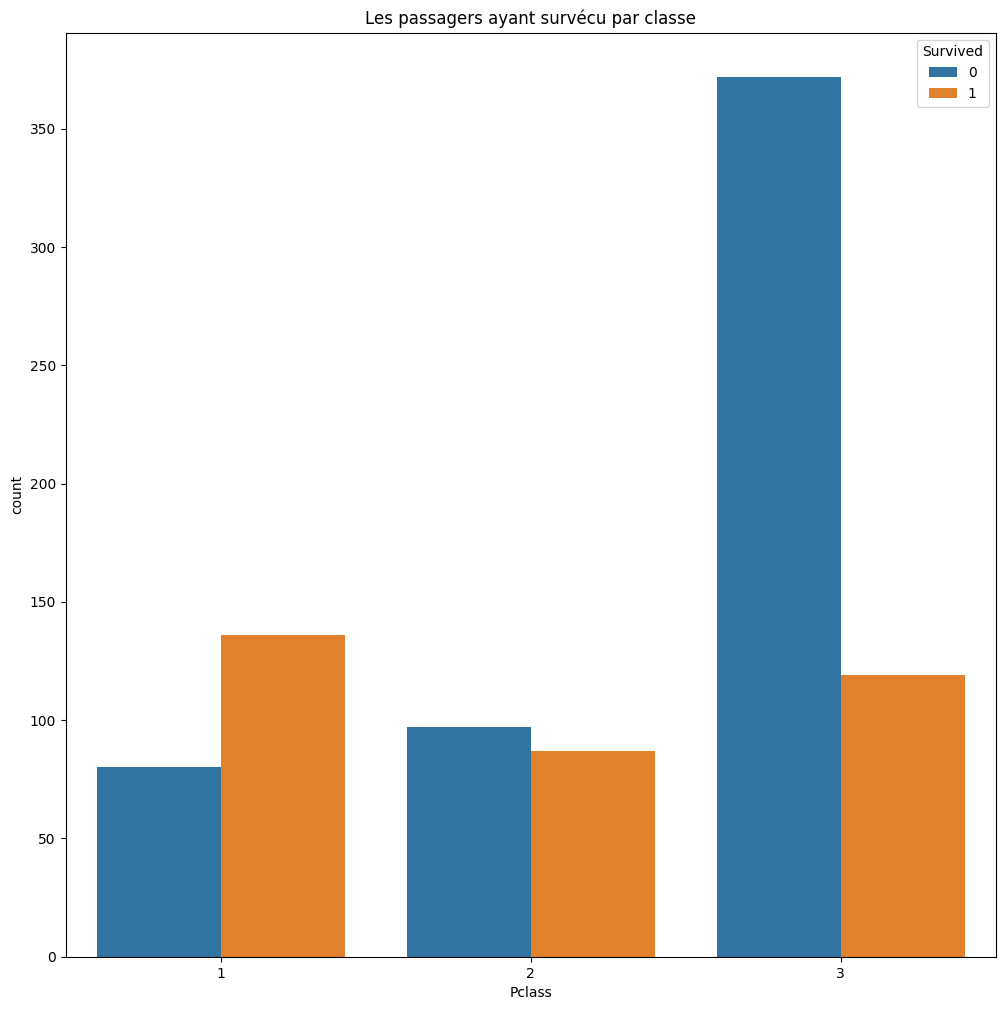

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title(f'Les passagers ayant survécu par classe')
plt.show()

######**Analyse hommes/femmes à bord du Titanic**

Sex
male      577
female    314
Name: count, dtype: int64


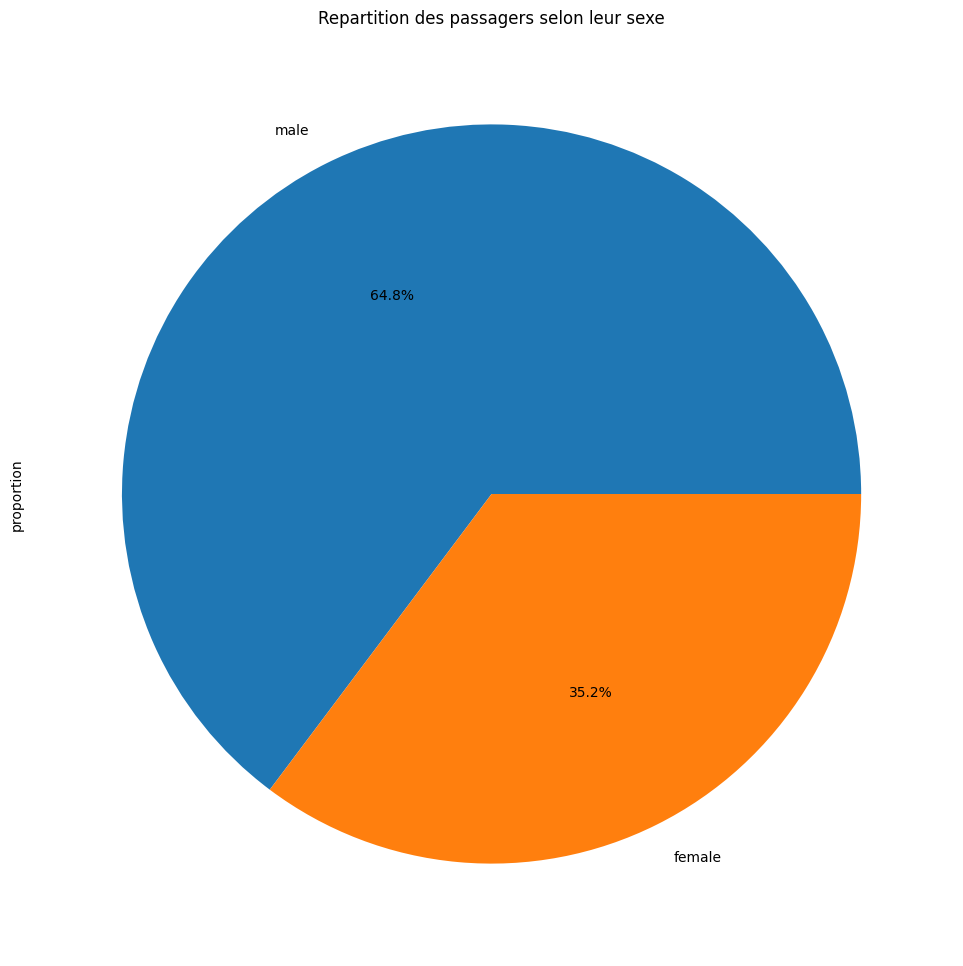

In [ ]:
print(train['Sex'].value_counts())

plt.figure(figsize=(12, 12))
plt.subplot()
train['Sex'].value_counts(normalize=True).plot.pie(figsize=(18, 12), autopct='%1.1f%%')
plt.title(f'Repartition des passagers selon leur sexe')
plt.show()

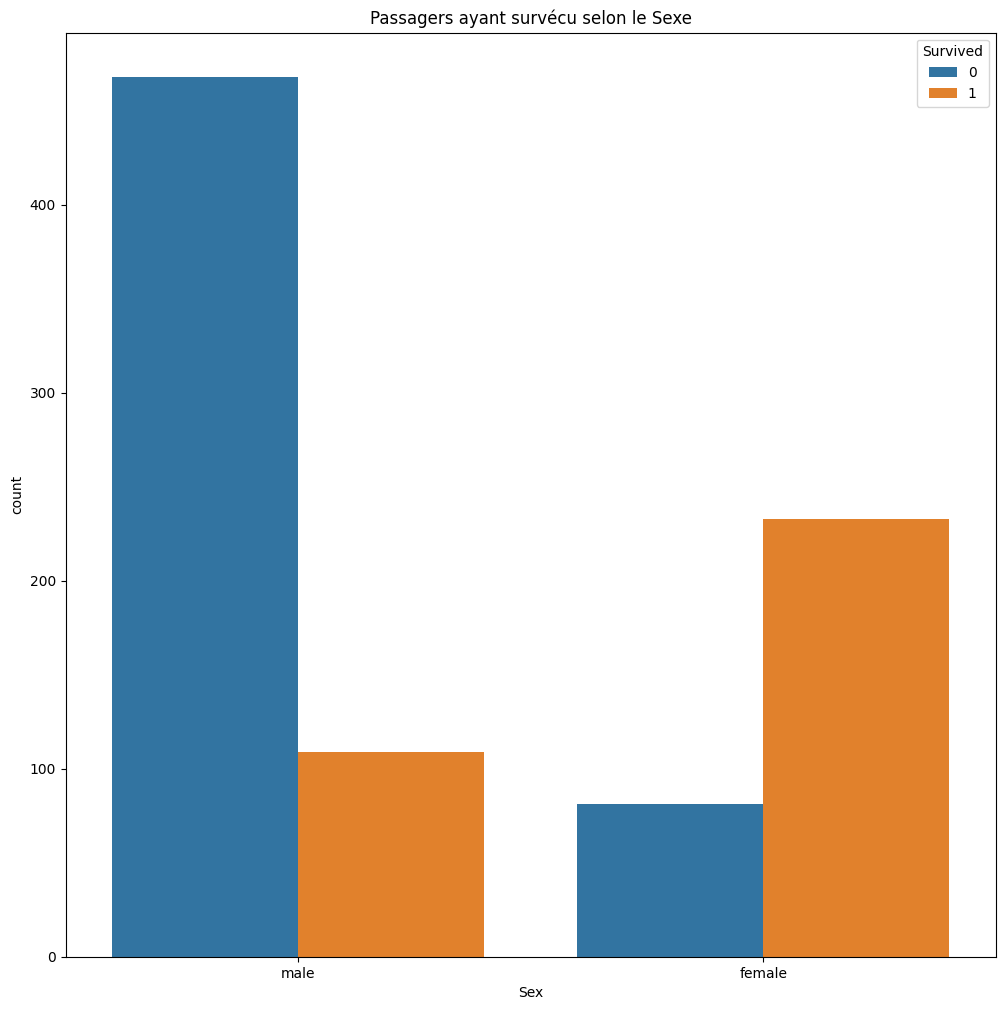

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title(f'Passagers ayant survécu selon le Sexe')
plt.show()

######**Analyse de l'âge des passagers à bord du Titanic**
Quel était l'âge des survivants ?

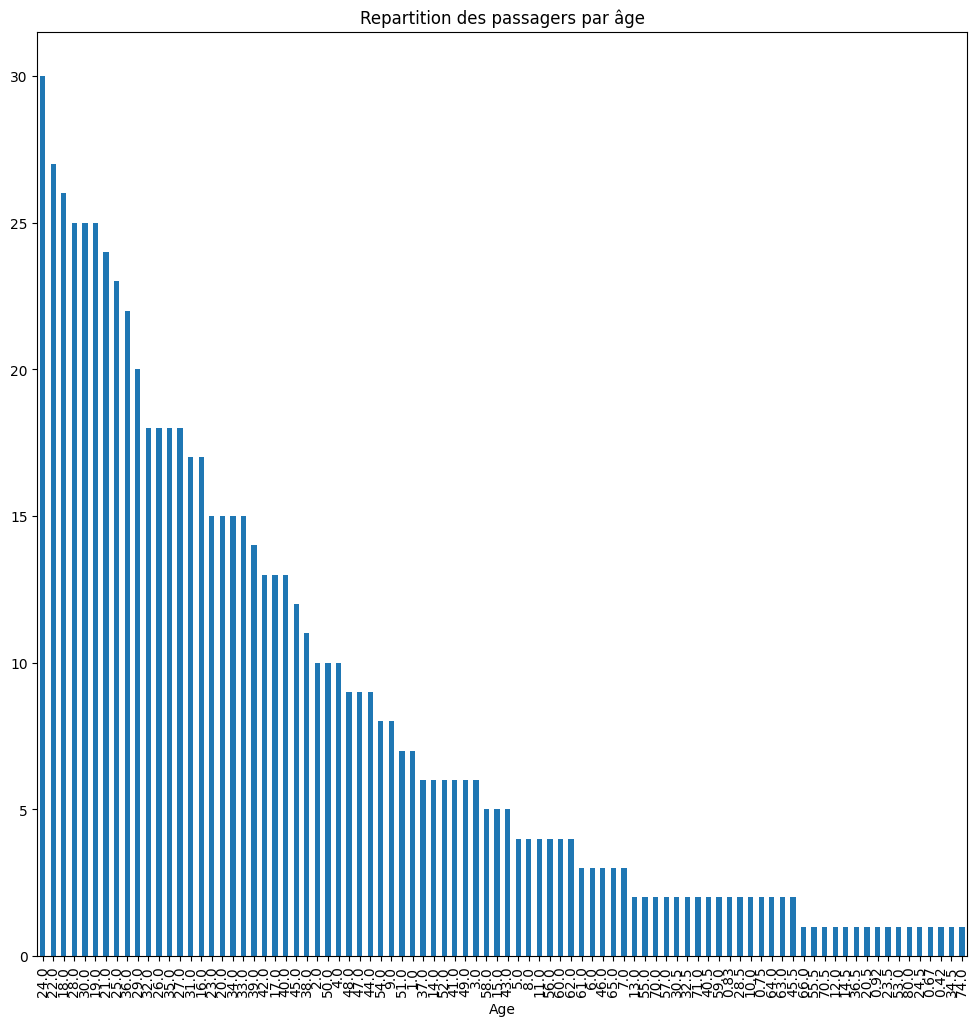

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
train['Age'].value_counts().plot(kind='bar')
plt.title(f'Repartition des passagers par âge')
plt.show()

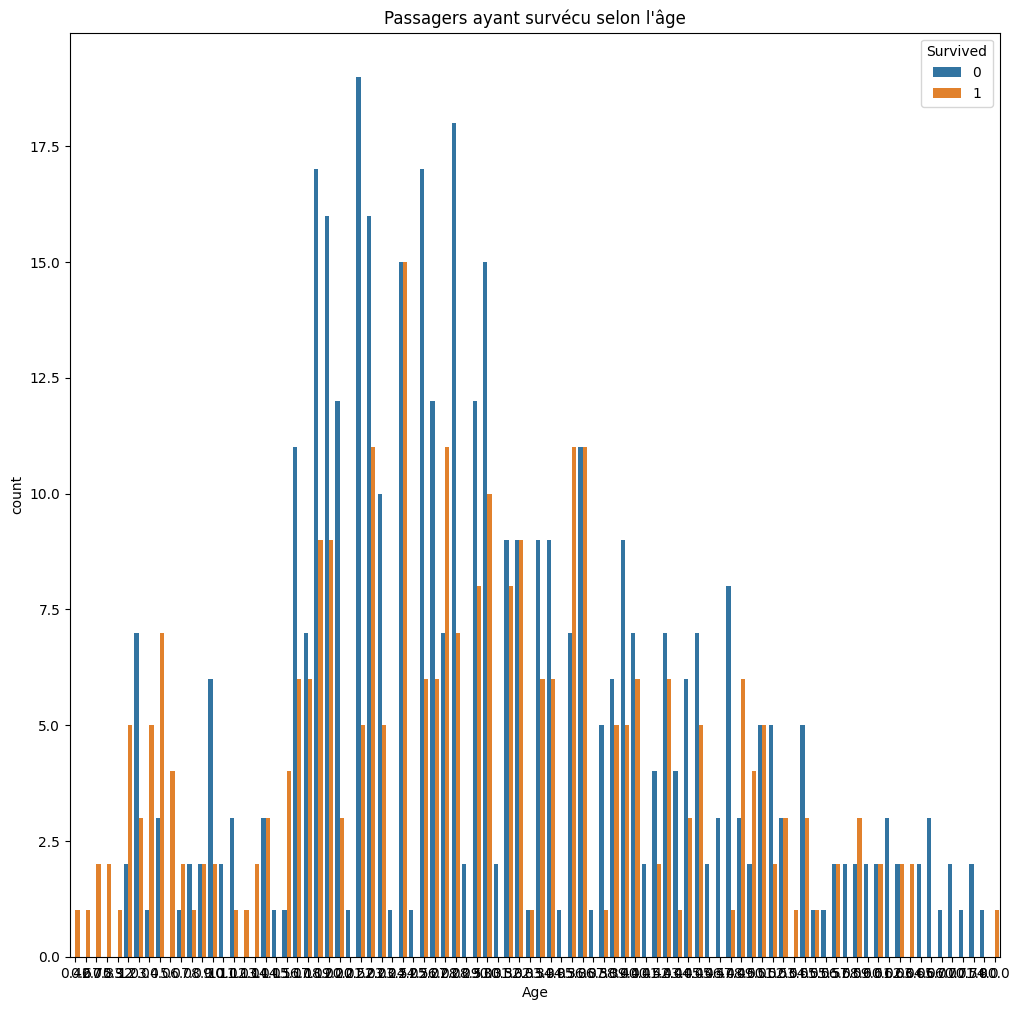

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.countplot(x='Age', hue='Survived', data=train)
plt.title(f"Passagers ayant survécu selon l'âge")
plt.show()


######**Analyse de la tarification des passagers à bord du Titanic**
Quel était le tarif payé par la plupart des survivants ?

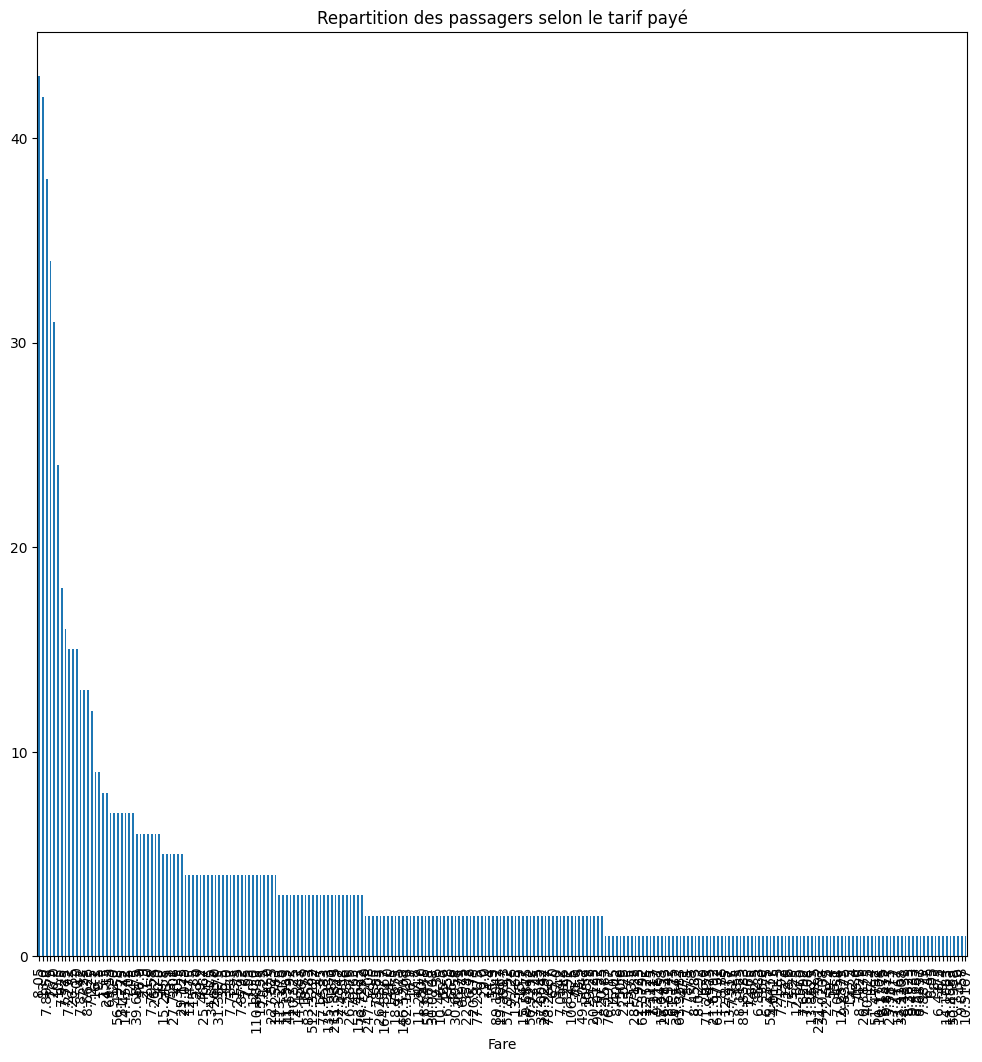

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
train['Fare'].value_counts().plot(kind='bar')
plt.title(f'Repartition des passagers selon le tarif payé')
plt.show()

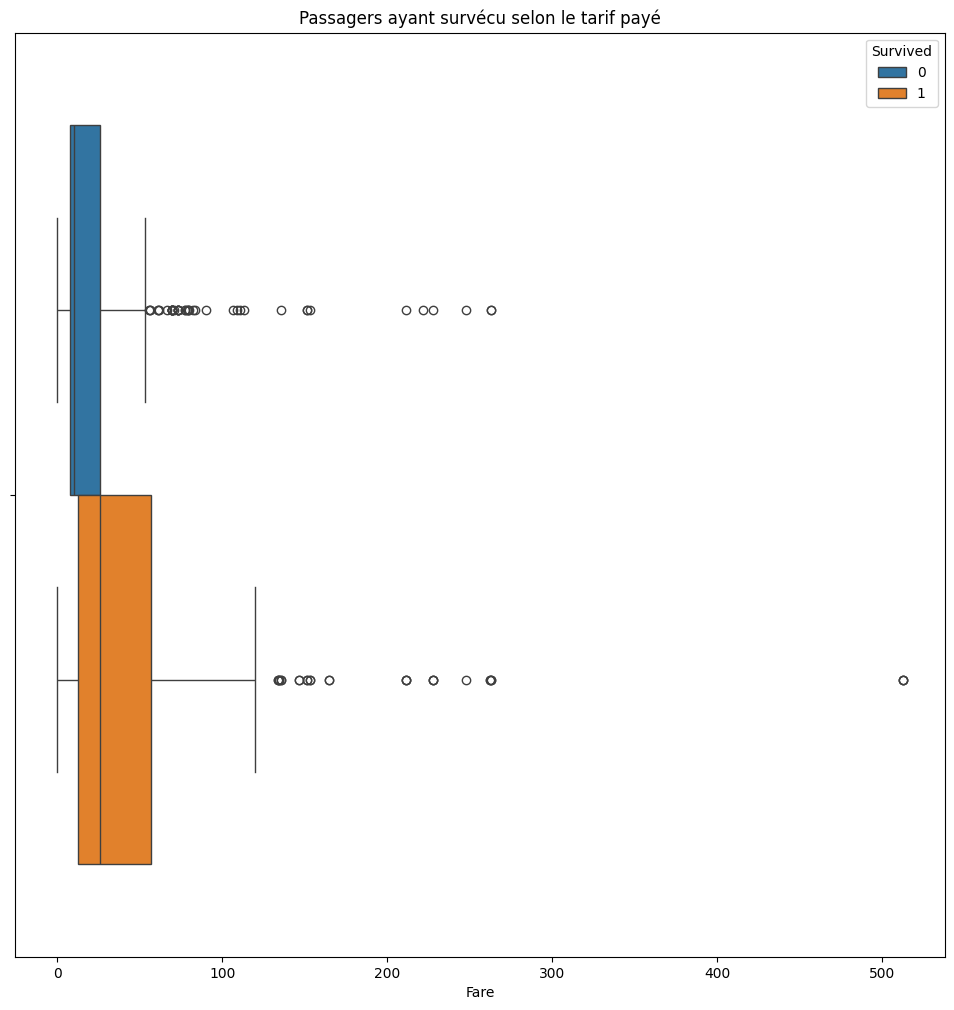

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.boxplot(x='Fare', hue='Survived', data=train)
plt.title(f"Passagers ayant survécu selon le tarif payé")
plt.show()

####**ANALYSE MULTIVARIÉE**

**Rapport Age/Tarif payé**

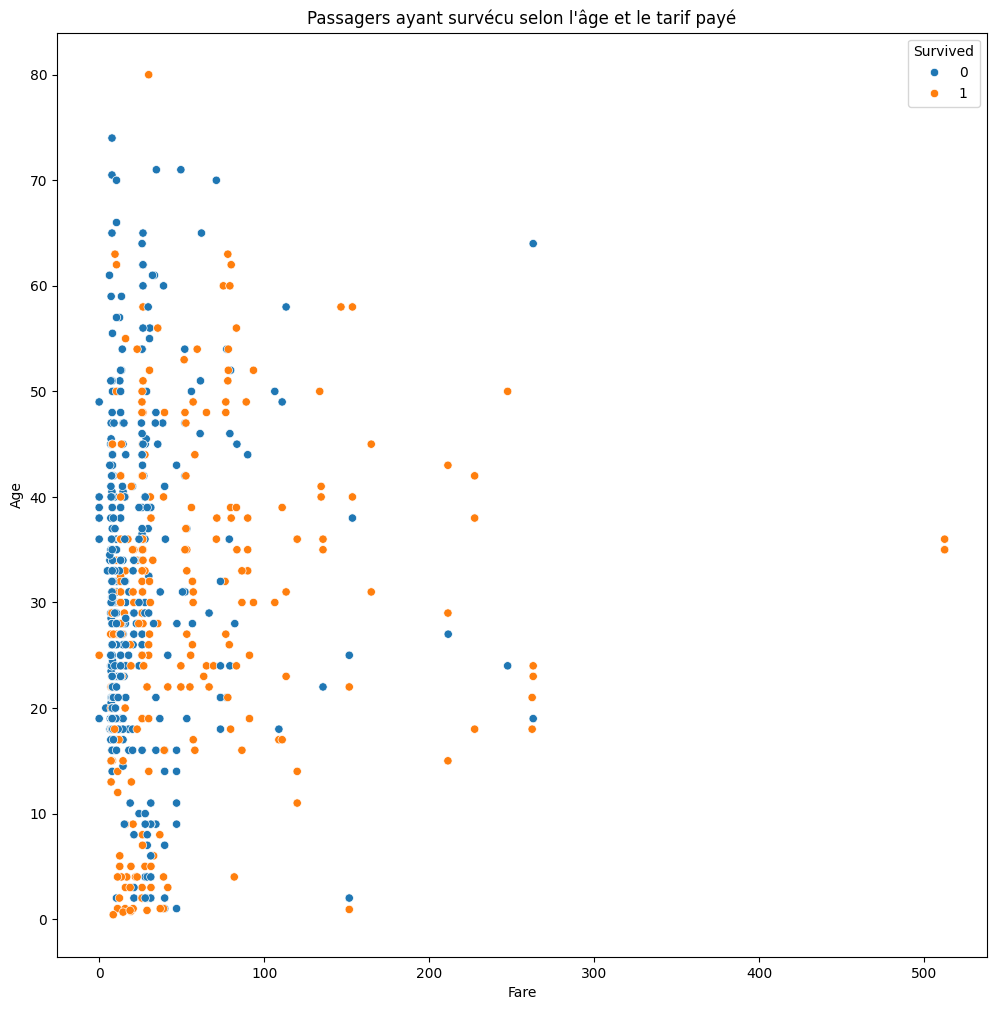

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=train)
plt.title(f"Passagers ayant survécu selon l'âge et le tarif payé")
plt.show()

**Quel était l'âge des survivants dans les classes à bord du Titanic ?**

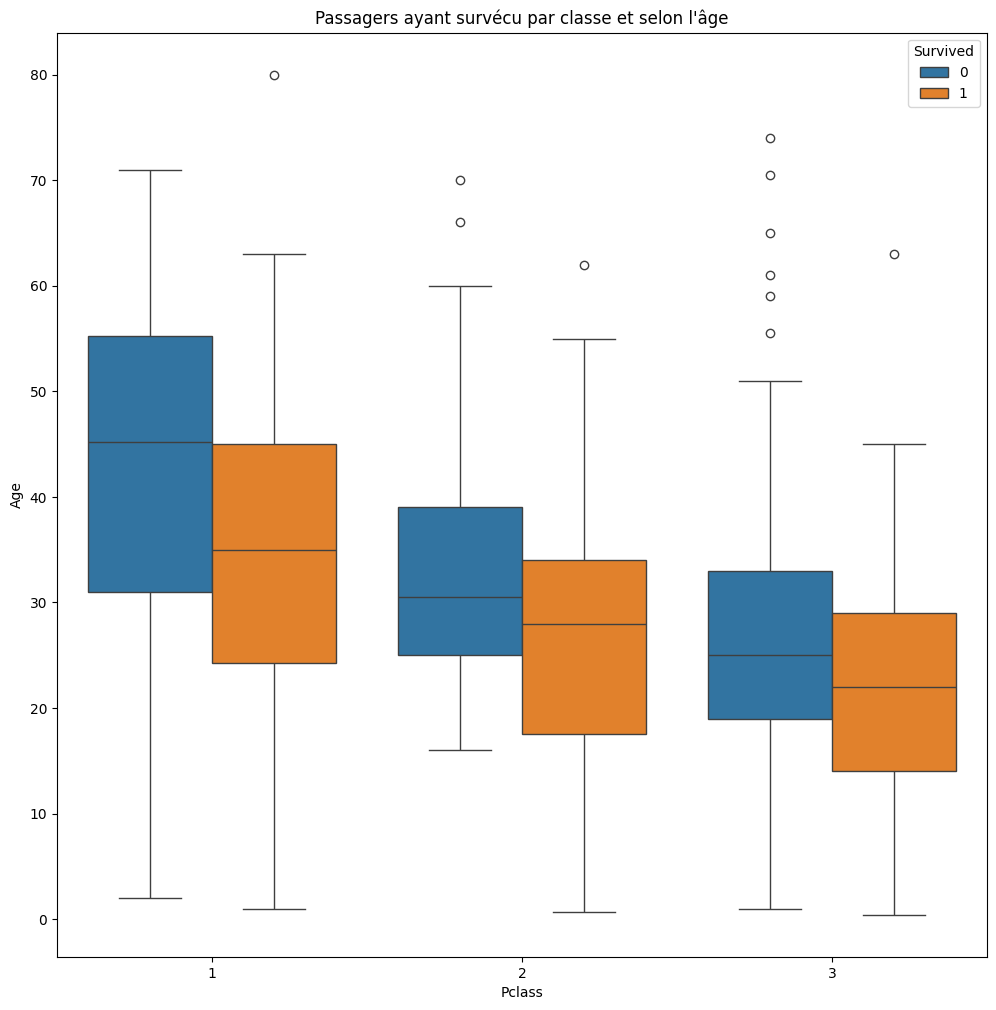

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train)
plt.title(f"Passagers ayant survécu par classe et selon l'âge")
plt.show()

**Quel était l'âge des hommes/femmes ayant survécu au naufrage du Titanic ?**

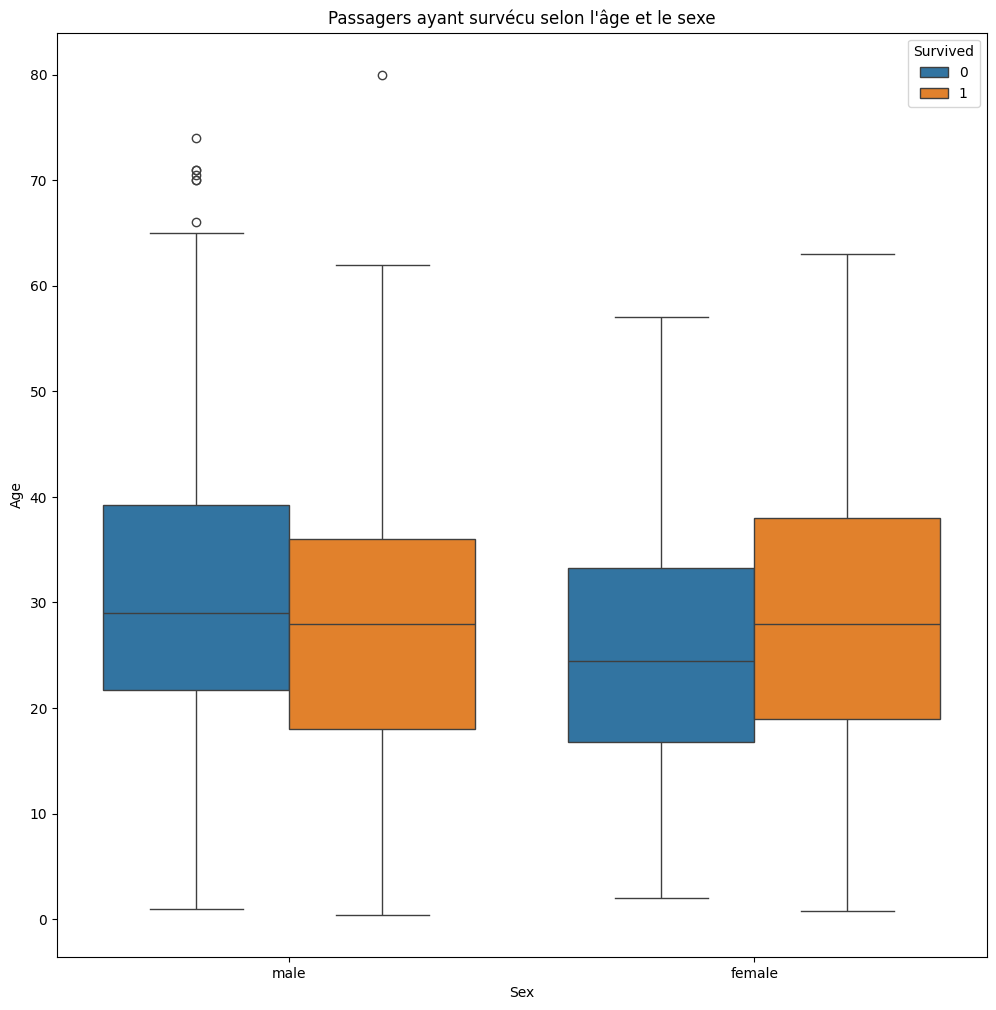

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.boxplot(x='Sex', y='Age', hue='Survived', data=train)
plt.title(f"Passagers ayant survécu selon l'âge et le sexe")
plt.show()

**Comment était reparti les passagers hommes/femmes dans les classes à bord du Titanic ?**

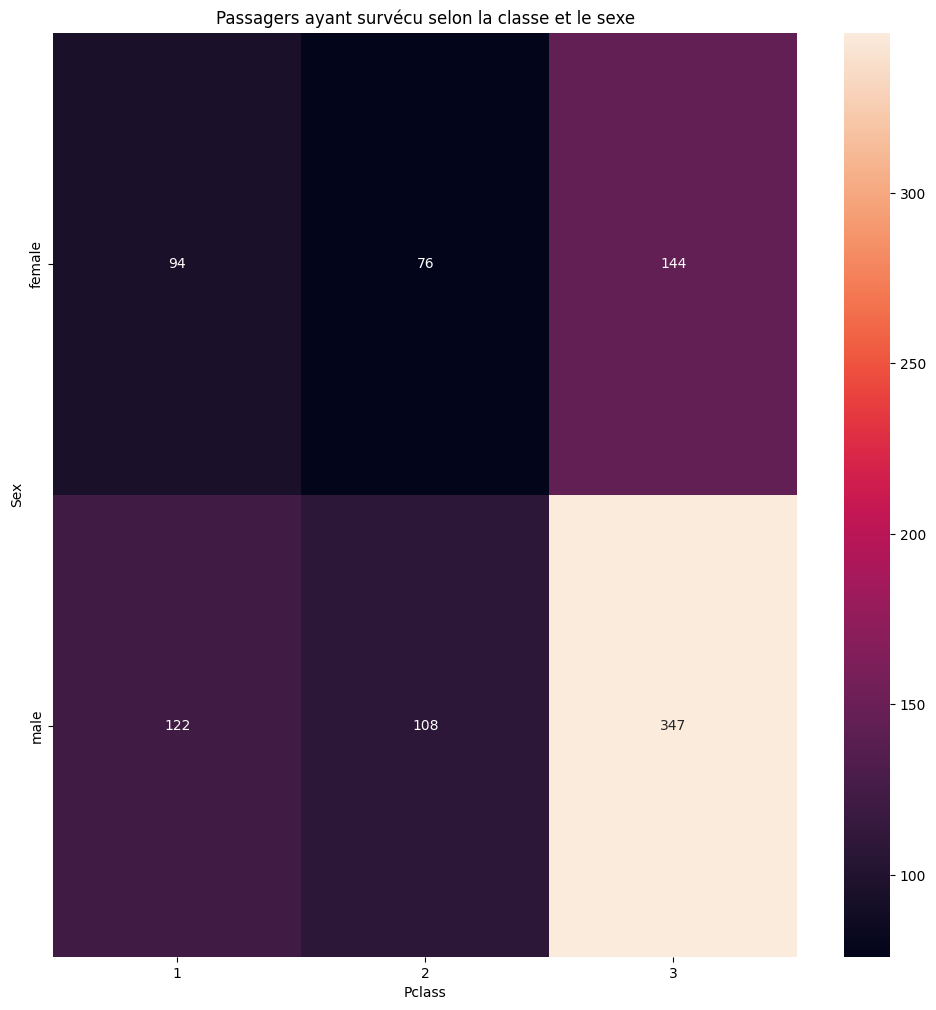

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.heatmap(pd.crosstab(train['Sex'], train['Pclass']), annot=True, fmt='d')
plt.title(f"Passagers ayant survécu selon la classe et le sexe")
plt.show()

**En quoi les survivants étaient liés à bord du Titanic ?**

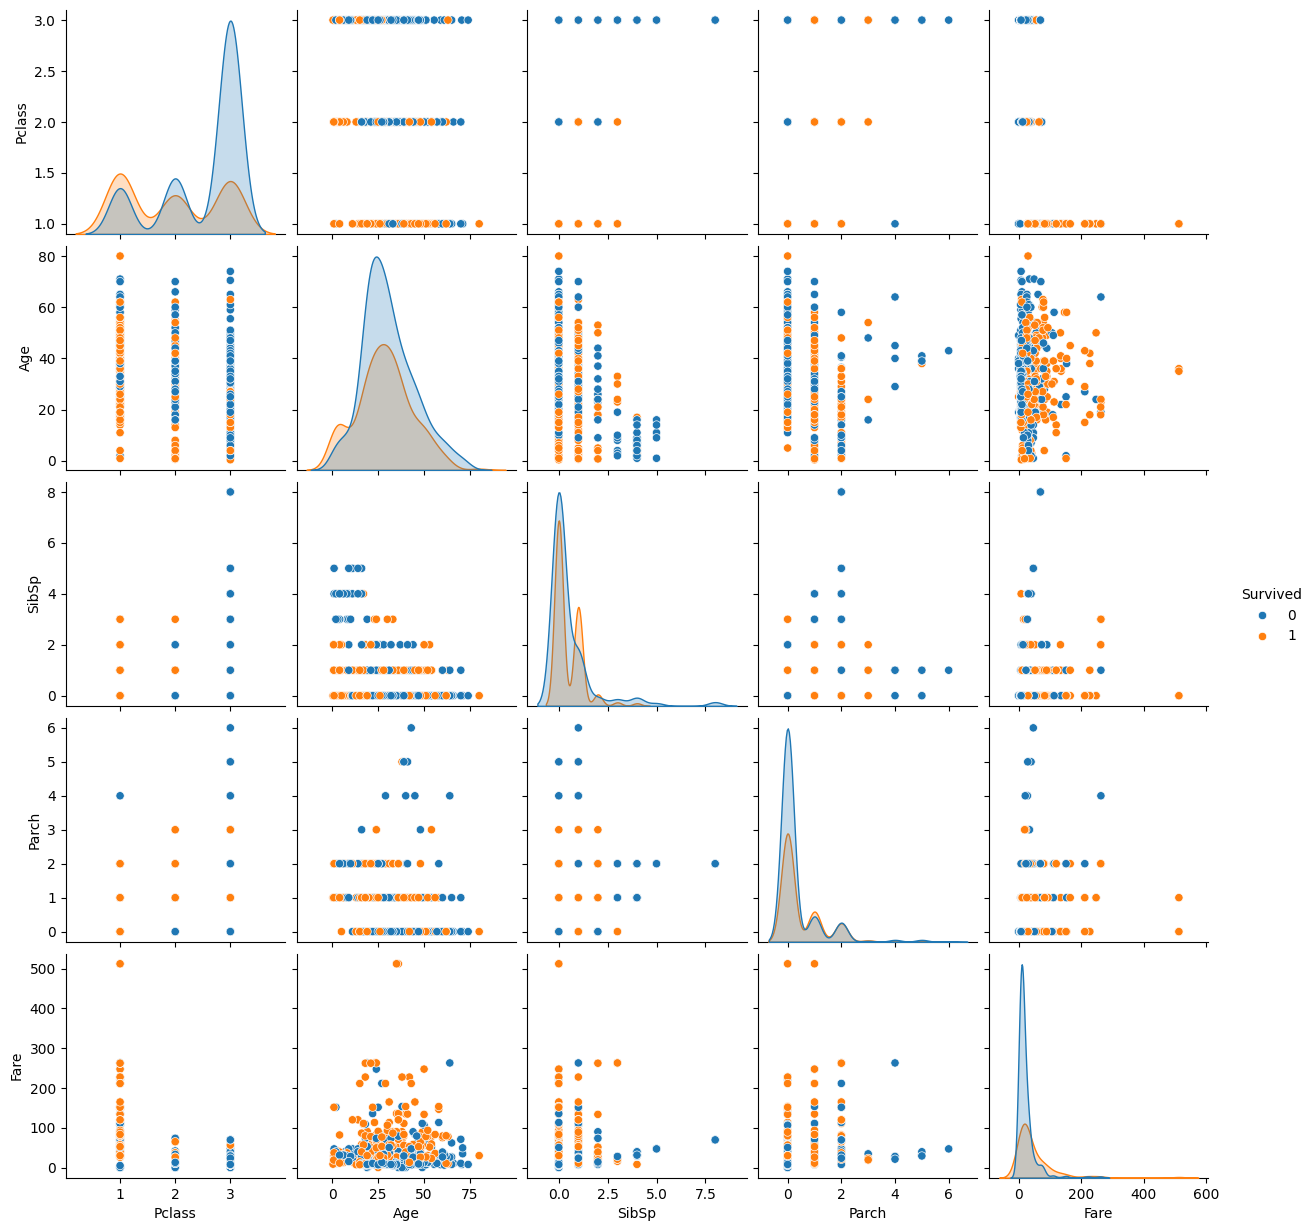

In [ ]:
sns.pairplot(train, hue='Survived')

**Création de nouvelle variable et Croisement des variables**

**Création d'une nouvelle variable CategoryAge répartissant les passagers selon leur catégorie d'âge : bébé, enfants, adolescent, jeune adulte, adulte ou personne âgée**

In [ ]:
def ClassAge(Age):
    if Age <= 1:
        return 'Bebe'
    elif (Age > 1) & (Age <= 12):
        return 'Enfant'
    elif (Age <= 13) & (Age < 18):
        return 'Adolescent'
    elif (Age >= 18) & (Age <= 30):
        return 'Jeune Adultes'
    elif (Age > 30) & (Age <= 60):
        return 'Adulte'
    else:
        return 'Personne Agee'

train['CategoryAge'] = train['Age'].map(ClassAge)

**Catégorie d'âge des passagers à bord du Titanic**

In [ ]:
train['CategoryAge'].value_counts()

,count
CategoryAge,
Jeune Adultes,296
Adulte,283
Personne Agee,241
Enfant,55
Bebe,14
Adolescent,2


**Les survivants selon leur catégorie d'âge à bord du Titanic**

In [ ]:
pd.crosstab(train['CategoryAge'], train['Survived'])

Survived,0,1
CategoryAge,,
Adolescent,0,2
Adulte,164,119
Bebe,2,12
Enfant,27,28
Jeune Adultes,191,105
Personne Agee,165,76


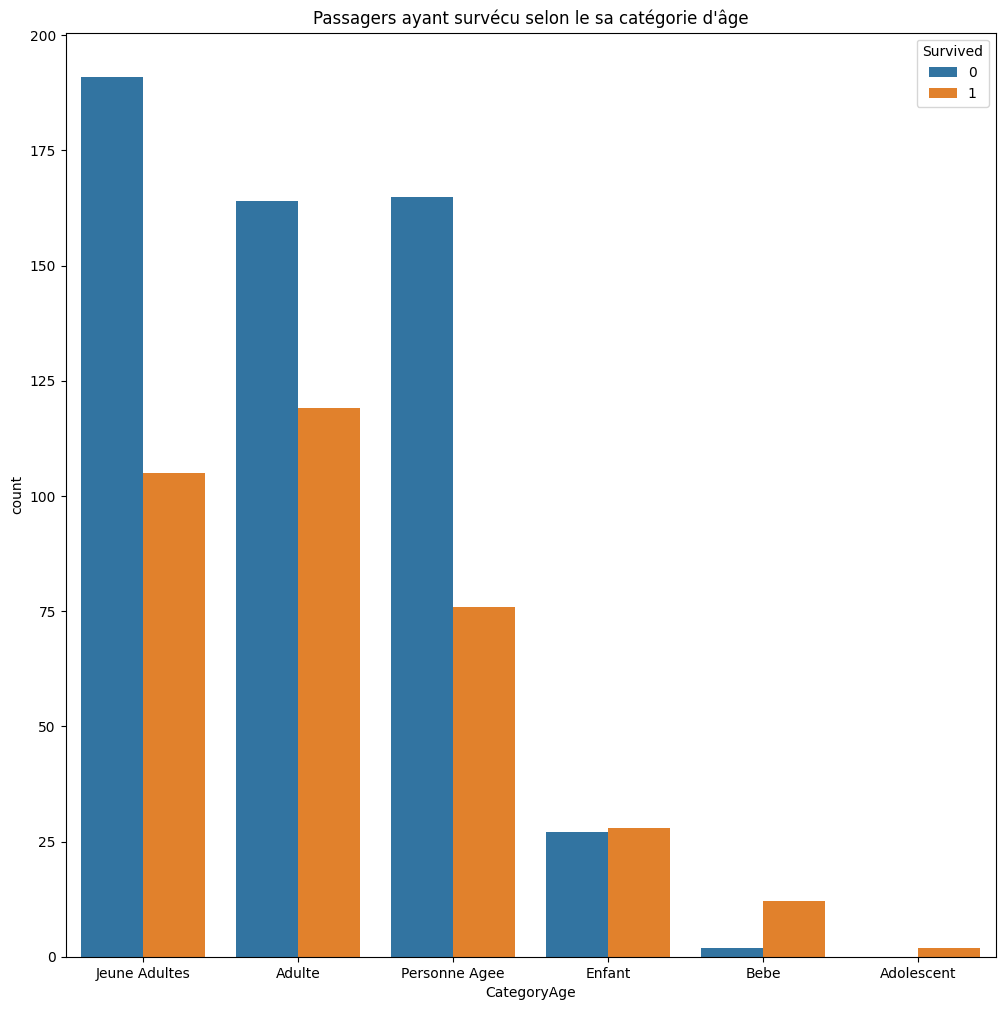

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot()
sns.countplot(x='CategoryAge', hue='Survived', data=train)
plt.title(f"Passagers ayant survécu selon le sa catégorie d'âge")
plt.show()

**Tarif moyen payé par les survivants à bord du Titanic**

In [ ]:
train.groupby(['Survived'])['Fare'].mean()

,Fare
Survived,
0,22.117887
1,48.395408


**L'âge des survivants à bord du Titanic**

In [ ]:
train.groupby(['Survived'])['Age'].mean()

,Age
Survived,
0,30.626179
1,28.343690


**L'âge moyen des survivants dans les différentes classes à bord du Titanic**

In [ ]:
train.groupby(['Survived'])['Age'].mean()

,Age
Survived,
0,30.626179
1,28.343690


**Les passagers hommes/femmes ayant survécu dans les différentes classes**

In [ ]:
train.groupby(['Survived', 'Pclass', 'Sex']).size()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
dtype: int64

**Les passagers hommes/femmes ayant survécu selon la catégorie d'âge**

In [ ]:
train.groupby(['Survived', 'Sex', 'CategoryAge']).size()

Survived  Sex     CategoryAge  
0         female  Adulte            20
                  Enfant            13
                  Jeune Adultes     27
                  Personne Agee     21
          male    Adulte           144
                  Bebe               2
                  Enfant            14
                  Jeune Adultes    164
                  Personne Agee    144
1         female  Adolescent         2
                  Adulte            80
                  Bebe               4
                  Enfant            15
                  Jeune Adultes     76
                  Personne Agee     56
          male    Adulte            39
                  Bebe               8
                  Enfant            13
                  Jeune Adultes     29
                  Personne Agee     20
dtype: int64

**Les passagers ayant survécu dans les différentes classes selon la catégorie d'âge**

In [ ]:
train.groupby(['Survived', 'Pclass', 'Sex', 'CategoryAge']).size()

Survived  Pclass  Sex     CategoryAge  
0         1       female  Adulte             1
                          Enfant             1
                          Jeune Adultes      1
                  male    Adulte            37
                          Jeune Adultes     13
                          Personne Agee     27
          2       female  Adulte             3
                          Jeune Adultes      3
                  male    Adulte            40
                          Jeune Adultes     40
                          Personne Agee     11
          3       female  Adulte            16
                          Enfant            12
                          Jeune Adultes     23
                          Personne Agee     21
                  male    Adulte            67
                          Bebe               2
                          Enfant            14
                          Jeune Adultes    111
                          Personne Agee    106
1         1       female  Adulte            47
                          Jeune Adultes     26
                          Personne Agee     18
                  male    Adulte            26
                          Bebe               1
                          Enfant             2
                          Jeune Adultes      9
                          Personne Agee      7
          2       female  Adolescent         1
                          Adulte            27
                          Enfant             8
                          Jeune Adultes     29
                          Personne Agee      5
                  male    Adulte             4
                          Bebe               5
                          Enfant             4
                          Jeune Adultes      1
                          Personne Agee      3
          3       female  Adolescent         1
                          Adulte             6
                          Bebe               4
                          Enfant             7
                          Jeune Adultes     21
                          Personne Agee     33
                  male    Adulte             9
                          Bebe               2
                          Enfant             7
                          Jeune Adultes     19
                          Personne Agee     10
dtype: int64

#**RESULTAT DE L'ANALYSE**

##**RESULTATS PRÉLIMINAIRES DE L'ANALYSE**

Les ensembles de données d'entraînement et de test ont été chargés avec succès.
L'ensemble d'entraînement contient 891 lignes et 12 colonnes, tandis que l'ensemble de test en contient 418 lignes et 11.

Les types de données sont variés, avec des entiers, des objets (chaînes de caractères) et des nombres décimaux.
Aucun doublon n'a été trouvé dans l'ensemble d'entraînement.

**Inspection des valeurs manquantes**

La colonne 'Cabin' présente un grand nombre de valeurs manquantes (77,1%).
La colonne 'Age' a également une proportion significative de valeurs manquantes (19,9%).

La colonne 'Embarked' a un petit nombre de valeurs manquantes (0,2%).
Les autres colonnes n'ont pas de valeurs manquantes.

**Anonymisation et filtrage des caractéristiques**

Les colonnes 'PassengerId', 'Name', 'Ticket' et 'Cabin' ont été exclues de l'analyse initiale en raison de leur pertinence moindre ou du nombre élevé de valeurs manquantes.

L'analyse se concentre désormais sur les colonnes 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', et 'Embarked'.

##**Analyse exploratoire des données (EDA)**

Survived: Environ 38,4% des passagers ont survécu.

SibSp: La majorité des passagers voyageaient sans frères et sœurs ni conjoints (68,2%).

La survie semble plus élevée pour ceux qui voyageaient avec 1 ou 2 frères/sœurs/conjoints.

Parch: La plupart des passagers voyageaient sans parents ni enfants (76,1%).

La survie semble plus élevée pour ceux qui voyageaient avec 1 ou 2 parents/enfants.

Fare: La distribution des tarifs est fortement asymétrique, avec la plupart des passagers payant un tarif bas. Le boxplot suggère que les survivants ont tendance à avoir payé des tarifs plus élevés.

Embarked: La majorité des passagers ont embarqué à Southampton (S), suivi de Cherbourg (C) et Queenstown (Q). Les passagers ayant embarqué à Cherbourg semblent avoir un taux de survie plus élevé.

Pclass: La majorité des passagers voyageaient en 3ème classe, suivi de la 1ère et de la 2ème classe. Le taux de survie est nettement plus élevé en 1ère classe.

Sex: Il y a plus d'hommes que de femmes à bord. Le taux de survie des femmes est beaucoup plus élevé que celui des hommes.

Age: La distribution des âges est variée.Les boxplots montrent que l'âge médian des survivants est légèrement inférieur à celui des non-survivants.

#**RAPPORT FINAL D'ANALYSE DU NAUFRAGE DU TITANIC SELON LES DONNÉES A DISPOSITION**

**L'analyse des données sur la survie des passagers a révélée plusieurs facteurs clés .** **Il semblerait que :**

**1 - Les femmes, les passagers de 1ère classe et les enfants/bébés avaient des taux de survie significativement plus élevés.**

**2 - Payer un tarif plus élevé et embarquer à Cherbourg semble être également associés à un meilleur taux de survie.**

**3 - Les deux adolescentes à bord du Titanic ont toutes survécu au naufrage.**

##**pour confirmer ou infirmer ces résultats, il faudrait appliquer des tests statistiques par une certitude absolue**